Copyright (c) 2022 [Georgina Flesia](georgina.flesia@unc.edu.ar)


<center>
<img src="ods_stickers.jpg" />
    
## Introducción al Machine Learning

Traducido y editado al español por [Ana Georgina Flesia](https://www.linkedin.com/in/georginaflesia/). Este material esta sujeto a los términos y condiciones de la licencia  [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso irrestricto para todo propósito no comercial.
    

http://www.famaf.proed.unc.edu.ar/course/view.php?id=936

# IntML2022 - Trabajo especial


La base de datos sobre la cual trabajaremos será la base de datos FIFA2022 que se encuentra en el archivo 'players_22.csv'.

Estas son las posiciones de los jugadores listados en el archivo Fifa22

https://www.kaggle.com/stefanoleone992/fifa-22-complete-player-dataset


 El objetivo del trabajo es predecir la posicion general en el campo  de juego (Defensor, Mediocampista, Atacante) a partir de sus atributos generales. Las posiciones serán categorizadas de la siguiente manera (utilizar los colores indicados cuando se refiera a cada clase):  


**Arqueros**: Naranja

- GK: Goalkeeper

**Defensores**: Amarillo

- CB: Center-back
- LCB: Left center-back
- RCB: Right center-back
- LB: Left-back (Full-back)
- RB: Right-back (Full-back)

**Mediocampista**: Verde

- CM : Centre midfield
- LDM: Left center midfield
- LAM: Left attacking midfield
- RDM: Right center midfield
- RAM: Right attacking midfield
- CDM: Centre defensive midfield
- CAM: Centre attacking midfield
- LM : Left midfield
- RM : Right midfield

**Delantero**: Azul

- ST: Striker
- CF: Center forward
- LW: Left winger
- RW: Right winger



 Este es un dataset con muchos NAN y campos vacios por lo cual hay que estudiar y corregir el dataset antes de correr los algoritmos.

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 1.) a.) Explique qué procedimiento se está realizando en las siguientes casillas.

Vamos a ir explicando después de cada una de las casillas.

In [2]:
data = pd.read_csv('players_22.csv')

arquero = ['GK']
defensor = ['CB', 'LCB', 'RCB', 'LB' , 'RB']
mediocampista = ['CM', 'LDM', 'LAM', 'RDM', 'CDM', 'CAM', 'LM', 'RM']
atacante = ['ST', 'CF', 'LW', 'RW']

data['posicion'] = ''
for i, posicion_del_jugador in enumerate(data['player_positions']):
    for posicion in arquero:
        if posicion in posicion_del_jugador:
            data.loc[i, 'posicion'] = 'arquero'
    for posicion in defensor:
        if posicion in posicion_del_jugador:
            data.loc[i, 'posicion'] = 'defensor'
    for posicion in mediocampista:
        if posicion in posicion_del_jugador:
            data.loc[i, 'posicion'] = 'mediocampista'
    for posicion in atacante:
        if posicion in posicion_del_jugador:
            data.loc[i, 'posicion'] = 'atacante'           

C:\Users\USUARIO\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


El DataFrame `data` no tiene la columna llamada `posicion` por lo tanto primero se crea una columna nueva al final que esta vacía. Después se asigna las variables 'GK' a arquero; 'CB', 'LCB',... a defensor y así sucesivamente.

El `for` arranca desde i=0 (hasta que sea necesario iterar) y también itera sobre cada posición del jugador, que está en la columna `player_positions`. El dato entra en el primer `for` y ahí compara la `posición` (arquero, defensor, mediocampista o atacante) con la `posicion_del_jugador` de esa iteracion. Si coincide con un string de la lista definida arriba, le asigna el valor de la posición en esa fila.

Una vez asignada la clase, pasa a los siguientes `for` hasta que se termina el proceso. Si un jugador comparte características de, por ejemplo, mediocampista y defensor, lo va a asignar primero en defensor pero después va a pasar al otro `for` del mediocampista y lo va a reasignar ahí. Por lo tanto, si algún jugador comparte características de dos posiciones diferentes, se lo etiquetará con la última de estas características.

In [3]:
nans = data.isna().sum().sort_values(ascending=False)
print(nans[nans!=0]/data.shape[0])

nation_jersey_number         0.960549
nation_logo_url              0.960549
nation_position              0.960549
nation_team_id               0.960549
club_loaned_from             0.942721
player_tags                  0.925100
goalkeeping_speed            0.889183
player_traits                0.511513
dribbling                    0.110817
shooting                     0.110817
passing                      0.110817
physic                       0.110817
defending                    0.110817
pace                         0.110817
release_clause_eur           0.061126
club_joined                  0.060450
value_eur                    0.003846
club_contract_valid_until    0.003171
league_level                 0.003171
club_jersey_number           0.003171
club_position                0.003171
league_name                  0.003171
club_name                    0.003171
wage_eur                     0.003171
club_logo_url                0.003171
club_flag_url                0.003171
club_team_id

La primera línea está preguntando si son o no 'NaN' y después cuenta, para aquellos que sí lo sean, cuánta cantidad hay y los ordena. En la segunda línea deja solo aquellos $\neq 0$ (es decir, todos los que tienen la casilla completa) y normaliza. De esta forma, lo que se está "printeando" es la cantidad normalizada de elementos que son NaN.

In [4]:
drop_vars = nans[list(nans/data.shape[0] > 0.5)].keys()
for var in drop_vars:
    print(var)
    data.drop(var,inplace=True,axis=1)

nation_jersey_number
nation_logo_url
nation_position
nation_team_id
club_loaned_from
player_tags
goalkeeping_speed
player_traits


Acá se están desechando todas las keys (los nombres de columnas) que tienen más de la mitad de NaN (nans). El `for` primero printea para mostrar que ésas son las que se van a 'droppear'.

In [5]:
data.fillna(data.mean(), inplace=True)

C:\PROGRA~1\KMSpico\temp/ipykernel_11228/1474580016.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


Donde había un NaN de los que se dejaron en el código anterior reemplaza por la media (solo en los números, en los `str` sigue dejando NaN).

In [6]:
categorical_variables = ['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'player_positions',
 'dob',
 'club_team_id',
 'club_name',
 'league_name',
 'league_level',
 'club_position',
 'club_jersey_number',
 'club_joined',
 'club_contract_valid_until',
 'nationality_id',
 'nationality_name',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'body_type',
 'real_face',
 'ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf',
 'rw',
 'lam',
 'cam',
 'ram',
 'lm',
 'lcm',
 'cm',
 'rcm',
 'rm',
 'lwb',
 'ldm',
 'cdm',
 'rdm',
 'rwb',
 'lb',
 'lcb',
 'cb',
 'rcb',
 'rb',
 'gk',
 'player_face_url',
 'club_logo_url',
 'club_flag_url',
 'nation_flag_url',
 'posicion']


for val in data:
    if val in categorical_variables:
        data[val]=data[val].astype('object')
    else:
        pd.to_numeric(data[val], downcast="float")

De las 103 columnas del df toma solo 55 y dice que, si `val` coincide con uno de los nombres definido en `categorical_variables`, lo define como `objeto`. En caso contrario (si es una de las 48 columnas restantes), las define como `flotante`.

In [7]:
X = data.loc[:,data.dtypes != 'object']

In [8]:
y = data['posicion']

Finalmente, de las columnas del df (que tienen `objects` y `floats`) se queda con todas las filas y con aquellas columnas que tengan `float` y las llama X. Además se define y=`posicion` de modo que queda un df con todos números y cuya última columna es la clase (`posicion`).

In [9]:
X.columns

Index(['overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm',
       'weight_kg', 'release_clause_eur', 'pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
      

Armamos el df con los datos filtrados

In [10]:
df_X = pd.DataFrame(X)
df_y = pd.DataFrame(y)

df = pd.concat([df_X, df_y], axis=1, join='inner')
df.head()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,release_clause_eur,pace,shooting,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,posicion
0,93,93,78000000.0,320000.0,34,170,72,144300000.0,85.0,92.0,...,96,20,35,24,6,11,15,14,8,atacante
1,92,92,119500000.0,270000.0,32,185,81,197200000.0,78.0,92.0,...,88,35,42,19,15,6,12,8,10,atacante
2,91,91,45000000.0,270000.0,36,187,83,83300000.0,87.0,94.0,...,95,24,32,24,7,11,15,14,11,atacante
3,91,91,129000000.0,270000.0,29,175,68,238700000.0,91.0,83.0,...,93,35,32,29,9,9,15,15,11,atacante
4,91,91,125500000.0,350000.0,30,181,70,232200000.0,76.0,86.0,...,89,68,65,53,15,13,5,10,13,mediocampista


### 2. a) Realice el análisis exploratorio que crea adecuado sobre la base de datos FIFA 2022 en donde explique cada paso que realiza.

Al análisis exploratorio lo vamos a hacer teniendo en cuenta los ejercicios siguientes para poder correlacionarlos (y algún que otro dato curioso):

In [11]:
print('El FIFA 2022 tiene', (df['posicion'] == 'arquero').sum(), 'arqueros,', (df['posicion'] == 'defensor').sum(), 'defensores, ', end='')
print((df['posicion'] == 'mediocampista').sum(), 'mediocampistas y', (df['posicion'] == 'atacante').sum(), 'delanteros.')

El FIFA 2022 tiene 2132 arqueros, 4656 defensores, 6689 mediocampistas y 5762 delanteros.


In [12]:
print('El promedio de de las variables Age, Overall, Potential, Stamina y Strength para cada clase es:')

clases = ['arquero', 'defensor', 'mediocampista', 'atacante']
et_clases = ['Arqueros', 'Defensores', 'Mediocampistas', 'Delanteros']
var_por_clase = ['age', 'overall', 'potential', 'power_stamina', 'power_strength']

df_vpc = pd.concat([pd.DataFrame(df[df['posicion'] == clase][var_por_clase].mean()) for clase in clases], axis=1)
df_vpc.columns = et_clases
df_vpc = df_vpc.set_axis(['Age', 'Overall', 'Potential', 'Stamina', 'Strength'], axis=0)
df_vpc

El promedio de de las variables Age, Overall, Potential, Stamina y Strength para cada clase es:


,Arqueros,Defensores,Mediocampistas,Delanteros
Age,26.198874,25.480026,24.859620,25.035404
Overall,64.419794,65.652706,65.756466,66.387365
Potential,69.785647,70.752363,71.270145,71.600833
Stamina,29.374296,66.817655,68.671251,66.056751
Strength,59.773921,71.672466,62.252205,64.757723


In [13]:
print('Los 8 países con mayor cantidad de:')
print('- jugadores federados')
print('- arqueros')
print('- defensores')
print('- mediocampistas')
print('- delanteros')

list_count = [data[data['posicion'] == clase]['nationality_name'].value_counts().head(8).reset_index() for clase in clases]
list_count.insert(0, data['nationality_name'].value_counts().head(8).reset_index())

df_count = pd.concat(list_count, axis=1)
df_count

arr = [['Federados', 'Federados', 'Arqueros', 'Arqueros', 'Defensores', 'Defensores', 'Mediocampistas', 'Mediocampistas', 'Delanteros', 'Delanteros'], 
       ['País','cant']*(len(clases)+1),]

tuples = list(zip(*arr))
index = pd.MultiIndex.from_tuples(tuples)

df_count.columns = index
df_count

Los 8 países con mayor cantidad de:
- jugadores federados
- arqueros
- defensores
- mediocampistas
- delanteros


Federados             Arqueros         Defensores      Mediocampistas  \
          País  cant           País cant          País cant           País   
0      England  1719        England  180       England  441        England   
1      Germany  1214        Germany  167        France  253        Germany   
2        Spain  1086          Spain  118       Germany  244          Spain   
3       France   980         France   97         Spain  242         France   
4    Argentina   960      Argentina   96        Brazil  213      Argentina   
5       Brazil   897         Brazil   70     Argentina  213         Brazil   
6        Japan   546  United States   70   Netherlands  133          Japan   
7  Netherlands   439          Japan   68  Saudi Arabia  116         Poland   

       Delanteros       
  cant       País cant  
0  522    England  576  
1  480    Germany  323  
2  418  Argentina  322  
3  357      Spain  308  
4  329     Brazil  299  
5  315     France  273  
6  208      Japan  158  
7  155     Sweden  135

In [14]:
print('Los jugadores de menor salario cobran', data['wage_eur'].min(), 'euros mientras que el salario promedio es de', data['wage_eur'].mean(), 'euros.')
print('Por otro lado, los de mayor salario cobran', data['wage_eur'].max(), 'euros y son:')
for name in data[data['wage_eur'] == data['wage_eur'].max()]['short_name']:print(name)
print()
print('Los jugadores más baratos cuestan', data['value_eur'].min(), 'euros en tanto que el más caro sale', data['value_eur'].max(), 'euros y es')
for name in data[data['value_eur'] == data['value_eur'].max()]['short_name']:print(name)


Los jugadores de menor salario cobran 500.0 euros mientras que el salario promedio es de 9017.989362811539 euros.
Por otro lado, los de mayor salario cobran 350000.0 euros y son:
K. De Bruyne
K. Benzema

Los jugadores más baratos cuestan 9000.0 euros en tanto que el más caro sale 194000000.0 euros y es
K. Mbappé


### 2.b) Grafique boxplots de las siguientes variables por clase : ['Age','Overall','Potential','Stamina','Strength']


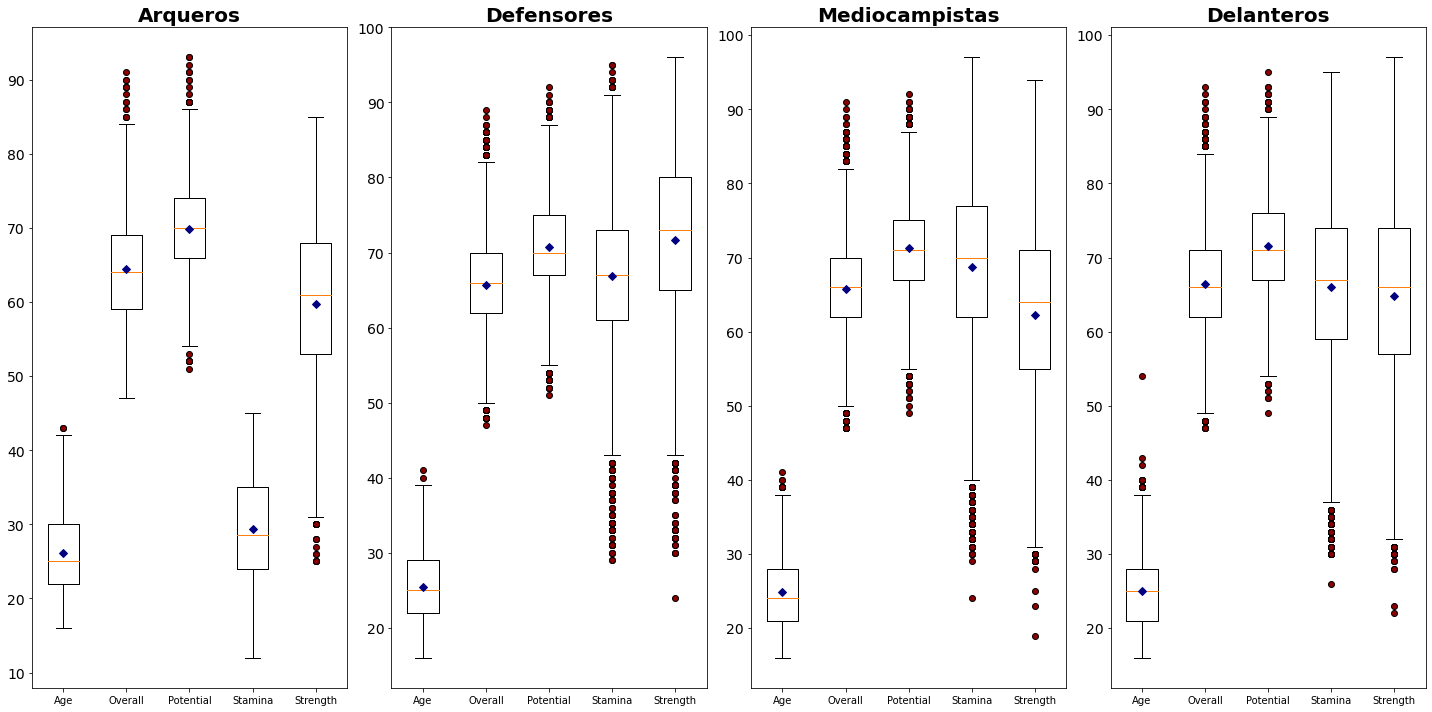

In [15]:
et_var = ['Age', 'Overall', 'Potential', 'Stamina', 'Strength']

dr_circle = dict(markerfacecolor='darkred', marker='o')
mean_shape = dict(markerfacecolor='navy', marker='D', markeredgecolor='navy')

fig, axs = plt.subplots(1, len(clases), figsize=(20,10))

for i, ax in enumerate(axs.flat) :
    ax.boxplot(df[df['posicion'] == clases[i]][var_por_clase], flierprops=dr_circle, showmeans=True, meanprops=mean_shape, labels=et_var)
    ax.set_title(et_clases[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)

plt.tight_layout()

Notemos que todas las variables son muy similares para cada clase salvo Stamina, que en los arqueros es mucho menor a las demás. Estas similitudes nos muestran que un análisis utilizando estas 5 variables sería muy poco preciso a la hora de clasificar las posiciones.

### 2.c) Plotee diagramas de torta mostrando cómo se distribuyen los 8 países con más jugadores federados dentro de las clases 


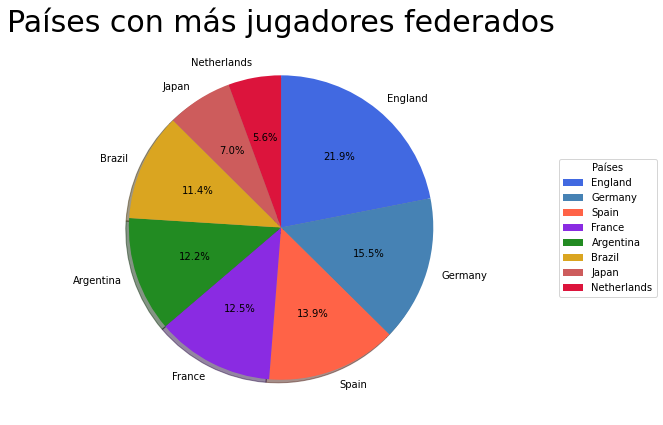

In [16]:
et_paises_jug = 'England', 'Germany', 'Spain', 'France', 'Argentina', 'Brazil', 'Japan', 'Netherlands'
colores_jug = ('royalblue', 'steelblue', 'tomato', 'blueviolet', 'forestgreen', 'goldenrod', 'indianred', 'crimson')

fig = plt.figure(figsize =(10, 7))

plt.pie(data['nationality_name'].value_counts().head(8), colors=colores_jug, labels=et_paises_jug, autopct='%1.1f%%', counterclock=False, shadow=True, startangle=90)
plt.legend(title='Países', loc='center right', bbox_to_anchor =(1, 0, 0.5, 1))
plt.title(label='Países con más jugadores federados', fontsize=30)
plt.show()

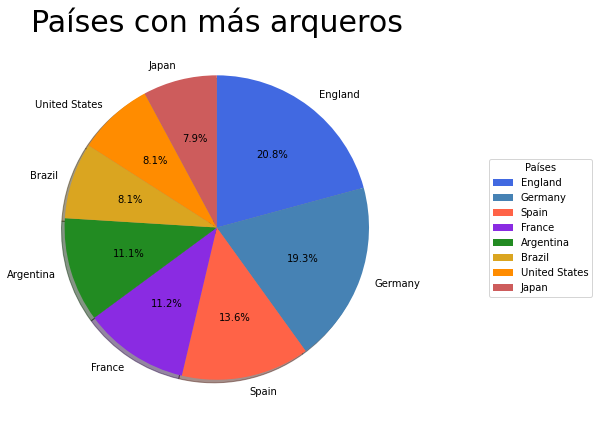

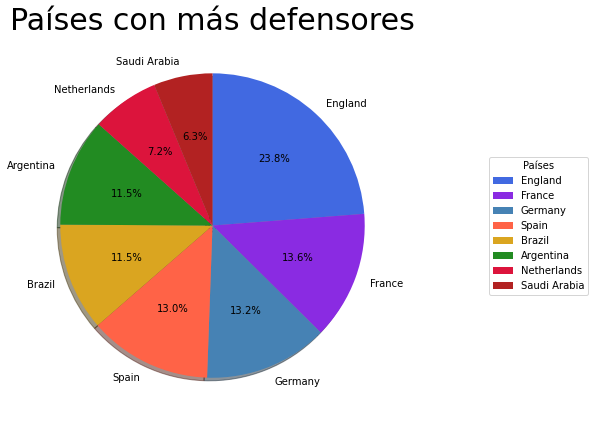

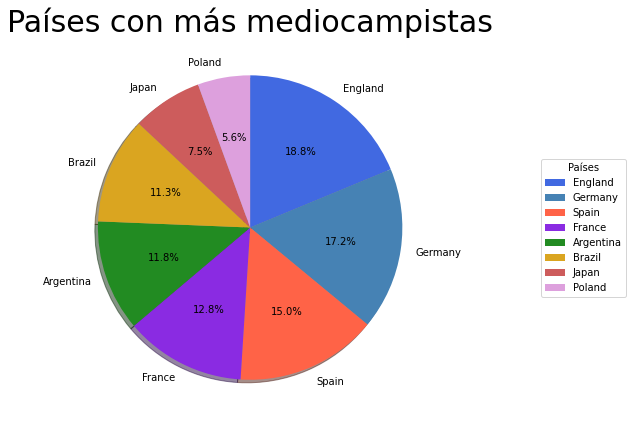

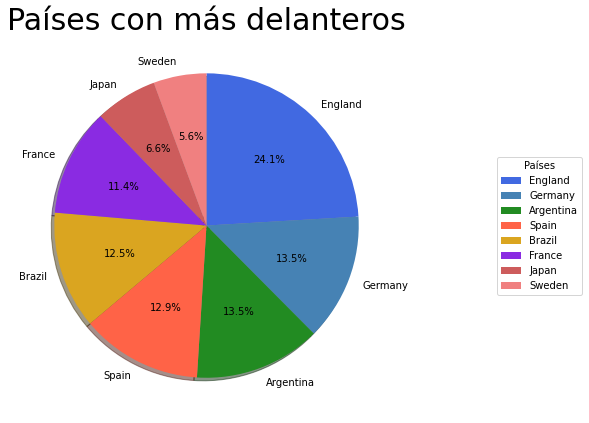

In [17]:
labels = ['arqueros','defensores','mediocampistas','delanteros']
et_paises = [list(data[data['posicion'] == clas]['nationality_name'].value_counts().head(8).index) for clas in clases]
colores = {
    'England':'royalblue', 
    'Germany':'steelblue', 
    'Spain':'tomato', 
    'France':'blueviolet', 
    'Argentina':'forestgreen', 
    'Brazil':'goldenrod', 
    'Japan':'indianred', 
    'Netherlands':'crimson',
    'United States':'darkorange',
    'Poland':'plum',
    'Sweden':'lightcoral',
    'Saudi Arabia':'firebrick'}

for i in range(0,len(clases)):
    fig = plt.figure(figsize =(10, 7))
    plt.pie(data[data['posicion'] == clases[i]]['nationality_name'].value_counts().head(8), colors=[colores[paises] for paises in et_paises[i]], labels=et_paises[i], autopct='%1.1f%%', counterclock=False, shadow=True, startangle=90)
    plt.legend(title='Países', loc='center right', bbox_to_anchor =(1, 0, 0.5, 1))
    plt.title(label='Países con más '+labels[i], fontsize=30)
    plt.show()    

### 3)  Observando que los arqueros son bien distintos a las restantes posiciones, los descartaremos del conjunto de datos (también descartar las variables que son exclusivas de arqueros, es decir que tienen 'goalkeeping' en el nombre). Quedarse sólo con defensores, mediocampistas y atacantes. Se desea elegir el mejor método (entre los que se presentan a continuación) que clasifique a los jugadores en las 3 clases mencionadas. 


Puede ayudarse con el siguiente material si lo desea.

https://www.youtube.com/watch?v=XXFLFWHP9Nc

https://www.youtube.com/watch?v=nuIqwnsrnH0

https://github.com/rasbt/stat451-machine-learning-fs20/tree/master/L11/code



    ###Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    ###GLM
    linear_model.LogisticRegressionCV(),
    linear_model.SGDClassifier(),
    
    ###Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    ###SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    ###Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    ###Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    ###xgboost: 
    XGBClassifier()    
    
  
    
Observe que los clasificadores están descritos con sus parámetros default. Decida qué parámetros va a usar para cada método, no tiene que elegirlos a todos, pero justifique su elección. Si el dataset resulta muy pesado puede utilizar diversas estrategias, como reducir el conjunto de datos a los mejores 3000 jugadores, o proyectar en las primeras componentes principales. Son estrategias muy diferentes.

En primer lugar vamos a eliminar tanto la clase `arquero` como sus variables asociadas, que son las que comienzan con `'goalkeeping_'`.

Veamos cuáles son estas variables a descartar:

In [18]:
df.columns

Index(['overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm',
       'weight_kg', 'release_clause_eur', 'pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
      

Sin contar `posicion`, las 5 últimas son las que tenemos que desechar, como así también la clase `arquero`:

In [19]:
df_no_GK_var = df.drop(columns=['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes'])
#df_no_GK_var.shape
df_no_GK = df_no_GK_var.drop(df_no_GK_var[df_no_GK_var['posicion'] == 'arquero'].sample(frac=1).index)
df_no_GK.shape

(17107, 44)

Las dimensiones del nuevo df tienen sentido pero vamos a controlar que efectivamente no haya arqueros:

In [20]:
df_no_GK['posicion'].value_counts()

mediocampista    6689
atacante         5762
defensor         4656
Name: posicion, dtype: int64

Perfecto! Ya tenemos nuestro nuevo dataset de las 3 clases que queremos y con las variables deseadas.

### 3. a) Sin hacer validación cruzada (utilizando los valores de default más algunos parámetros elegidos por ustedes que crean adecuados en cada método) y separando el conjunto de datos en 0.8 de entrenamiento y 0.2 de prueba, determine el mejor modelo para la tarea de clasificación de los jugadores en su posición. Arme una tabla comparativa con los las exactitudes (accuracies) obtenidas para identificar el mejor modelo. 

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import time

#Ensambles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

#Lineales
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import SGDClassifier

#Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

#SVM
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.svm import LinearSVC

#Árboles
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier

#LDA y QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#XGBoost
from xgboost import XGBClassifier

Separamos el conjunto en datos de entrenamiento y testeo en una proporción 80%-20%:

In [23]:
X = df_no_GK.drop(['posicion'], axis=1)
y = df_no_GK.posicion

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

Y ya estamos en condiciones de usar los clasificadores. Para los parámetros que se modificaron, las variaciones se hicieron al azar pero cuidando que los resultados sean razonables (por ejemplo que la tasa de clasificación no sea demasiado baja o que el programa demore mucho tiempo). 

### _AdaBoostClassifier_

In [24]:
n_estimators = [10, 50, 100, 200]

def ABC_clf(n):
    st = time.time()
    clf = AdaBoostClassifier(n_estimators=n, random_state=123)	
    clf.fit(X_train, y_train)
    y = clf.predict(X_test)
    et = time.time()
    return (y, et-st)

for n in n_estimators:
        yy = ABC_clf(n)
        print('Test accuracy:', 100*np.round(accuracy_score(y_test, yy[0]), 3), '%. Tiempo:', np.round(yy[1],3), 'seg. n_est:', n)

Test accuracy: 69.39999999999999 %. Tiempo: 0.613 seg. n_est: 10
Test accuracy: 73.2 %. Tiempo: 3.59 seg. n_est: 50
Test accuracy: 72.2 %. Tiempo: 6.841 seg. n_est: 100
Test accuracy: 73.6 %. Tiempo: 16.63 seg. n_est: 200


### _BaggingClassifier_

In [25]:
n_estimators = [10, 50, 100, 200]

def BC_clf(n):
    st = time.time()
    clf = BaggingClassifier(n_estimators=n, random_state=123)	
    clf.fit(X_train, y_train)
    y = clf.predict(X_test)
    et = time.time()
    return (y, et-st)

for n in n_estimators:
        yy = BC_clf(n)
        print('Test accuracy:', 100*np.round(accuracy_score(y_test, yy[0]), 3), '%. Tiempo:', np.round(yy[1],3), 'seg. n_est:', n)

Test accuracy: 76.8 %. Tiempo: 6.061 seg. n_est: 10
Test accuracy: 78.3 %. Tiempo: 26.427 seg. n_est: 50
Test accuracy: 78.8 %. Tiempo: 49.789 seg. n_est: 100
Test accuracy: 79.3 %. Tiempo: 97.542 seg. n_est: 200


### _ExtraTreesClassifier_

In [26]:
criterion = ['gini', 'entropy']
max_depth = [10, 15, 20, None]

def ETs_clf(c, m):
    st = time.time()
    clf = ExtraTreesClassifier(criterion=c, max_depth=m, random_state=123)	
    clf.fit(X_train, y_train)
    y = clf.predict(X_test)
    et = time.time()
    return (y, et-st)

for criteria in criterion:
    for m in max_depth:
        yy = ETs_clf(criteria, m)
        print('Test accuracy:', 100*np.round(accuracy_score(y_test, yy[0]), 3), '%. Tiempo:', np.round(yy[1],3), 'seg. criterion:', criteria, '. max_depth:', m)

Test accuracy: 76.3 %. Tiempo: 2.312 seg. criterion: gini . max_depth: 10
Test accuracy: 77.9 %. Tiempo: 3.212 seg. criterion: gini . max_depth: 15
Test accuracy: 78.2 %. Tiempo: 4.219 seg. criterion: gini . max_depth: 20
Test accuracy: 79.0 %. Tiempo: 4.603 seg. criterion: gini . max_depth: None
Test accuracy: 76.6 %. Tiempo: 3.704 seg. criterion: entropy . max_depth: 10
Test accuracy: 78.0 %. Tiempo: 4.577 seg. criterion: entropy . max_depth: 15
Test accuracy: 78.9 %. Tiempo: 6.263 seg. criterion: entropy . max_depth: 20
Test accuracy: 79.2 %. Tiempo: 5.113 seg. criterion: entropy . max_depth: None


### _GradientBoostingClassifier_

In [27]:
n_estimators = [50, 100, 200]

def GBC_clf(n):
    st = time.time()
    clf = GradientBoostingClassifier(n_estimators=n, random_state=123)	
    clf.fit(X_train, y_train)
    y = clf.predict(X_test)
    et = time.time()
    return (y, et-st)

for n in n_estimators:
        yy = GBC_clf(n)
        print('Test accuracy:', 100*np.round(accuracy_score(y_test, yy[0]), 3), '%. Tiempo:', np.round(yy[1],3), 'seg. n_est:', n)

Test accuracy: 78.5 %. Tiempo: 22.021 seg. n_est: 50
Test accuracy: 79.10000000000001 %. Tiempo: 39.468 seg. n_est: 100
Test accuracy: 78.8 %. Tiempo: 94.057 seg. n_est: 200


### _RandomForestClassifier_

In [28]:
n_estimators = [50, 100, 200]

def RFC_clf(n):
    st = time.time()
    clf = RandomForestClassifier(n_estimators=n, random_state=123)	
    clf.fit(X_train, y_train)
    y = clf.predict(X_test)
    et = time.time()
    return (y, et-st)

for n in n_estimators:
        yy = RFC_clf(n)
        print('Test accuracy:', 100*np.round(accuracy_score(y_test, yy[0]), 3), '%. Tiempo:', np.round(yy[1],3), 'seg. n_est:', n)

Test accuracy: 78.8 %. Tiempo: 4.92 seg. n_est: 50
Test accuracy: 79.10000000000001 %. Tiempo: 8.885 seg. n_est: 100
Test accuracy: 78.60000000000001 %. Tiempo: 13.129 seg. n_est: 200


Los próximos 6 clasificadores si los uso como venía haciendo clasifican muy mal (como vamos a ver con el ejemplo siguiente). Por lo tanto vamos a estandarizar los datos de entrenamiento usando `StandardScaler()` 

In [30]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)  # compute mean, std and transform training data as well
X_test_sc = scaler.transform(X_test)  # same as above

### _LogisticRegressionCV (sin sc)_

In [31]:
import warnings
warnings.filterwarnings('ignore')

solver = ['lbfgs', 'liblinear']
Cs = [1, 5, 10]

def LRCV_clf(cs, s):
    st = time.time()
    clf = LogisticRegressionCV(Cs=cs, solver=s)	
    clf.fit(X_train, y_train)
    y = clf.predict(X_test)
    et = time.time()
    return (y, et-st)

for s in solver:
    for cs in Cs:
        yy = LRCV_clf(cs, s)
        print('Test accuracy:', 100*np.round(accuracy_score(y_test, yy[0]), 3), '%. Tiempo:', np.round(yy[1],3),'seg. Cs:', cs, 'solver:', s)

Test accuracy: 33.800000000000004 %. Tiempo: 1.016 seg. Cs: 1 solver: lbfgs
Test accuracy: 33.800000000000004 %. Tiempo: 2.093 seg. Cs: 5 solver: lbfgs
Test accuracy: 33.800000000000004 %. Tiempo: 2.913 seg. Cs: 10 solver: lbfgs
Test accuracy: 60.8 %. Tiempo: 9.021 seg. Cs: 1 solver: liblinear
Test accuracy: 56.99999999999999 %. Tiempo: 45.564 seg. Cs: 5 solver: liblinear
Test accuracy: 54.1 %. Tiempo: 81.571 seg. Cs: 10 solver: liblinear


### _LogisticRegressionCV (con sc)_

In [32]:
import warnings
warnings.filterwarnings('ignore')

solver = ['lbfgs', 'liblinear']
Cs = [1, 5, 10]

def LRCV_clf(cs, s):
    st = time.time()
    clf = LogisticRegressionCV(Cs=cs, solver=s)	
    clf.fit(X_train_sc, y_train)
    y = clf.predict(X_test_sc)
    et = time.time()
    return (y, et-st)

for s in solver:
    for cs in Cs:
        yy = LRCV_clf(cs, s)
        print('Test accuracy:', 100*np.round(accuracy_score(y_test, yy[0]), 3), '%. Tiempo:', np.round(yy[1],3),'seg. Cs:', cs, 'solver:', s)

Test accuracy: 74.9 %. Tiempo: 0.996 seg. Cs: 1 solver: lbfgs
Test accuracy: 78.7 %. Tiempo: 16.616 seg. Cs: 5 solver: lbfgs
Test accuracy: 78.8 %. Tiempo: 27.509 seg. Cs: 10 solver: lbfgs
Test accuracy: 73.8 %. Tiempo: 2.458 seg. Cs: 1 solver: liblinear
Test accuracy: 78.7 %. Tiempo: 36.467 seg. Cs: 5 solver: liblinear
Test accuracy: 78.8 %. Tiempo: 72.344 seg. Cs: 10 solver: liblinear


### _SGDClassifier_

In [33]:
loss = ['hinge', 'log', 'modified_huber', 'squared_hinge']

def SGDC_clf(l):
    st = time.time()
    clf = SGDClassifier(loss=l, random_state=123)	
    clf.fit(X_train_sc, y_train)
    y = clf.predict(X_test_sc)
    et = time.time()
    return (y,et - st)

for l in loss:
        yy = SGDC_clf(l)
        print('Test accuracy:', 100*np.round(accuracy_score(y_test, yy[0]), 3), '%. Tiempo:', np.round(yy[1],3),'seg. loss:', l)

Test accuracy: 78.5 %. Tiempo: 1.008 seg. loss: hinge
Test accuracy: 77.7 %. Tiempo: 1.03 seg. loss: log
Test accuracy: 77.10000000000001 %. Tiempo: 1.806 seg. loss: modified_huber
Test accuracy: 70.6 %. Tiempo: 0.911 seg. loss: squared_hinge


### _KNeighborsClassifier_

In [34]:
n_neighbors= [5, 6, 7, 8, 9, 10, 15]

def KNN_clf(n):
    st = time.time()
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train_sc, y_train)
    y = clf.predict(X_test_sc)
    et = time.time()
    return (y, et-st)

for n in n_neighbors:
        yy = KNN_clf(n)
        print('Test accuracy:', 100*np.round(accuracy_score(y_test, yy[0]), 3), '%. Tiempo:', np.round(yy[1],3),'seg. n_neighbors:', n)

Test accuracy: 75.8 %. Tiempo: 0.971 seg. n_neighbors: 5
Test accuracy: 76.4 %. Tiempo: 0.773 seg. n_neighbors: 6
Test accuracy: 77.0 %. Tiempo: 0.731 seg. n_neighbors: 7
Test accuracy: 77.0 %. Tiempo: 0.667 seg. n_neighbors: 8
Test accuracy: 76.7 %. Tiempo: 0.698 seg. n_neighbors: 9
Test accuracy: 77.60000000000001 %. Tiempo: 0.758 seg. n_neighbors: 10
Test accuracy: 77.8 %. Tiempo: 0.769 seg. n_neighbors: 15


### _SVC_

In [35]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

def SVC_clf(k):
    st = time.time()
    clf = SVC(kernel=k, random_state=123)	
    clf.fit(X_train_sc, y_train)
    y = clf.predict(X_test_sc)
    et = time.time()
    return (y, et-st)

for k in kernel:
        yy = SVC_clf(k)
        print('Test accuracy:', 100*np.round(accuracy_score(y_test, yy[0]), 3), '%. Tiempo:', np.round(yy[1],3), 'seg. kernel:', k)

Test accuracy: 79.3 %. Tiempo: 35.644 seg. kernel: linear
Test accuracy: 77.8 %. Tiempo: 27.13 seg. kernel: poly
Test accuracy: 80.2 %. Tiempo: 27.204 seg. kernel: rbf
Test accuracy: 62.9 %. Tiempo: 22.643 seg. kernel: sigmoid


### _NuSVC_

In [36]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

def NUSVC_clf(k):
    st = time.time()
    clf = NuSVC(kernel=k, random_state=123)	
    clf.fit(X_train_sc, y_train)
    y = clf.predict(X_test_sc)
    et = time.time()
    return (y, et-st)

for k in kernel:
        yy = NUSVC_clf(k)
        print('Test accuracy:', 100*np.round(accuracy_score(y_test, yy[0]), 3), '%. Tiempo:', np.round(yy[1],3), 'seg. kernel:', k)

Test accuracy: 75.5 %. Tiempo: 47.97 seg. kernel: linear
Test accuracy: 71.1 %. Tiempo: 54.183 seg. kernel: poly
Test accuracy: 76.6 %. Tiempo: 60.338 seg. kernel: rbf
Test accuracy: 72.89999999999999 %. Tiempo: 63.311 seg. kernel: sigmoid


### _LinearSVC_

In [37]:
loss = ['squared_hinge', 'hinge']

def LSVC_clf(l):
    st = time.time()
    clf = LinearSVC(loss=l)	
    clf.fit(X_train_sc, y_train)
    y = clf.predict(X_test_sc)
    et = time.time()
    return (y, et-st)

for l in loss:
        yy = LSVC_clf(l)
        print('Test accuracy:', 100*np.round(accuracy_score(y_test, yy[0]), 3), '%. Tiempo:', np.round(yy[1],3), 'seg. loss:', l)

Test accuracy: 78.8 %. Tiempo: 21.063 seg. loss: squared_hinge
Test accuracy: 78.60000000000001 %. Tiempo: 6.17 seg. loss: hinge


A partir de acá los clasificadores dan nuevamente bien sin necesidad de usar el StandardScaler

### _DecisionTreeClassifier_

In [38]:
criterion = ['gini', 'entropy']
max_depth= [10, 15, 20, None]

def DTC_clf(c, m):
    st = time.time()
    clf = DecisionTreeClassifier(criterion=c, max_depth=m, random_state=123)	
    clf.fit(X_train, y_train)
    y = clf.predict(X_test)
    et = time.time()
    return (y, et-st)

for criteria in criterion:
    for m in max_depth:
        yy = DTC_clf(criteria, m)
        print('Test accuracy:', 100*np.round(accuracy_score(y_test, yy[0]), 3), '%. Tiempo:', np.round(yy[1],3), 'seg. criterion:', criteria, '. max_depth:', m)

Test accuracy: 75.1 %. Tiempo: 0.517 seg. criterion: gini . max_depth: 10
Test accuracy: 71.39999999999999 %. Tiempo: 0.571 seg. criterion: gini . max_depth: 15
Test accuracy: 69.89999999999999 %. Tiempo: 0.711 seg. criterion: gini . max_depth: 20
Test accuracy: 70.3 %. Tiempo: 0.727 seg. criterion: gini . max_depth: None
Test accuracy: 74.1 %. Tiempo: 0.499 seg. criterion: entropy . max_depth: 10
Test accuracy: 72.5 %. Tiempo: 0.877 seg. criterion: entropy . max_depth: 15
Test accuracy: 71.8 %. Tiempo: 0.803 seg. criterion: entropy . max_depth: 20
Test accuracy: 71.2 %. Tiempo: 0.759 seg. criterion: entropy . max_depth: None


### _ExtraTreeClassifier_

In [39]:
criterion = ['gini', 'entropy']
max_depth= [10, 15, 20, None]

def ETC_clf(c, m):
    st = time.time()
    clf = ExtraTreesClassifier(criterion=c, max_depth=m, random_state=123)	
    clf.fit(X_train, y_train)
    y = clf.predict(X_test)
    et = time.time()
    return (y, et-st)

for criteria in criterion:
    for m in max_depth:
        yy = ETC_clf(criteria, m)
        print('Test accuracy:', 100*np.round(accuracy_score(y_test, yy[0]), 3), '%. Tiempo:', np.round(yy[1],3), 'seg. criterion:', criteria, '. max_depth:', m)

Test accuracy: 76.3 %. Tiempo: 3.084 seg. criterion: gini . max_depth: 10
Test accuracy: 77.9 %. Tiempo: 4.776 seg. criterion: gini . max_depth: 15
Test accuracy: 78.2 %. Tiempo: 4.713 seg. criterion: gini . max_depth: 20
Test accuracy: 79.0 %. Tiempo: 5.491 seg. criterion: gini . max_depth: None
Test accuracy: 76.6 %. Tiempo: 2.462 seg. criterion: entropy . max_depth: 10
Test accuracy: 78.0 %. Tiempo: 3.644 seg. criterion: entropy . max_depth: 15
Test accuracy: 78.9 %. Tiempo: 4.351 seg. criterion: entropy . max_depth: 20
Test accuracy: 79.2 %. Tiempo: 4.714 seg. criterion: entropy . max_depth: None


### _LinearDiscriminantAnalysis_

In [40]:
solver = ['svd', 'lsqr', 'eigen']

def LDA_clf(s):
    st = time.time()
    clf = LinearDiscriminantAnalysis(solver=s)	
    clf.fit(X_train, y_train)
    y = clf.predict(X_test)
    et = time.time()
    return (y, et-st)

for s in solver:
        yy = LDA_clf(s)
        print('Test accuracy:', 100*np.round(accuracy_score(y_test, yy[0]), 3), '%. Tiempo:', np.round(yy[1],3), 'seg. solver:', s)

Test accuracy: 77.7 %. Tiempo: 0.361 seg. solver: svd
Test accuracy: 78.2 %. Tiempo: 0.251 seg. solver: lsqr
Test accuracy: 77.7 %. Tiempo: 0.215 seg. solver: eigen


### _QuadraticDiscriminantAnalysis_

In [41]:
r_params = [1e-4, 1e-3, 1e-2, 1e-1, 0]

def QDA_clf(r):
    st = time.time()
    clf = QuadraticDiscriminantAnalysis(reg_param=r)	
    clf.fit(X_train, y_train)
    y = clf.predict(X_test)
    et = time.time()
    return (y, et-st)

for r in r_params:
        yy = QDA_clf(r)
        print('Test accuracy:', 100*np.round(accuracy_score(y_test, yy[0]), 3), '%. Tiempo:', np.round(yy[1],3), 'seg. reg_param:', r)

Test accuracy: 76.9 %. Tiempo: 0.135 seg. reg_param: 0.0001
Test accuracy: 76.9 %. Tiempo: 0.125 seg. reg_param: 0.001
Test accuracy: 76.9 %. Tiempo: 0.14 seg. reg_param: 0.01
Test accuracy: 77.2 %. Tiempo: 0.157 seg. reg_param: 0.1
Test accuracy: 76.9 %. Tiempo: 0.132 seg. reg_param: 0


En XGBoost también usé el StandardScaler porque para un parámetro daba muy bajo asique se lo metí y lo mejoró.

### _XGBClassifier_

In [42]:
import warnings
warnings.filterwarnings('ignore')

booster = ['gbtree', 'gblinear', 'dart']

def XGB_clf(b):
    st = time.time()
    clf = XGBClassifier(booster=b)	
    clf.fit(X_train_sc, y_train)
    y = clf.predict(X_test_sc)
    et = time.time()
    return (y, et-st)

for b in booster:
        yy = XGB_clf(b)
        print('Test accuracy:', 100*np.round(accuracy_score(y_test, yy[0]), 3), '%. Tiempo:', np.round(yy[1],3), 'seg. booster:', b)

[18:19:45] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test accuracy: 78.4 %. Tiempo: 12.012 seg. booster: gbtree
[18:19:57] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test accuracy: 78.8 %. Tiempo: 1.99 seg. booster: gblinear
[18:19:59] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test accurac

Habiendo empleado todos los clasificadores, seleccionamos para cada uno los que mejor dieron y nos armamos una tabla:

In [43]:
clfs = { 'Clasificador':['AdaBoostClassifier', 'BaggingClassifier', 'ExtraTreesClassifier', 'GradientBoostingClassifier', 'RandomForestClassifier', 
        'LogisticRegressionCV', 'SGDClassifier', 'KNeighborsClassifier', 'SVC', 'NuSVC', 'LinearSVC', 'DecisionTreeClassifier', 'ExtraTreeClassifier', 
        'LinearDiscriminantAnalysis', 'QuadraticDiscriminantAnalysis', 'XGBoost'], 
        'Exactitud [%]':[73.6, 79.3, 79.2, 79.1, 79.1, 78.8, 78.8, 77.8, 80.2, 76.6, 78.8, 75.1, 79.2, 78.2, 77.2, 78.8], 
        'Tasa de mala Clasificación [%]':[26.4, 20.7, 20.8, 20.9, 20.9, 21.3, 21.2, 22.2, 19.8, 23.4, 21.2, 24.9, 20.8, 21.8, 22.8, 21.2],
        'Tiempo [seg]':['9.739', '67.752', '2.545', '24.253', '4.289', '26.347', '0.599', '1.041', '10.748', '22.259', '9.187', '0.337', '2.593', '0.193', '0.09', '5.145']
        }

df_clf = pd.DataFrame(clfs).sort_values(by=['Exactitud [%]'], ascending=False)
df_clf

,Clasificador,Exactitud [%],Tasa de mala Clasificación [%],Tiempo [seg]
8,SVC,80.2,19.8,10.748
1,BaggingClassifier,79.3,20.7,67.752
2,ExtraTreesClassifier,79.2,20.8,2.545
12,ExtraTreeClassifier,79.2,20.8,2.593
3,GradientBoostingClassifier,79.1,20.9,24.253
4,RandomForestClassifier,79.1,20.9,4.289
5,LogisticRegressionCV,78.8,21.3,26.347
6,SGDClassifier,78.8,21.2,0.599
10,LinearSVC,78.8,21.2,9.187
15,XGBoost,78.8,21.2,5.145


Como podemos ver, el mejor clasificador es _SVC_.

### 3. b) Optimice los hiperparámetros del mejor modelo elegido utilizando validación cruzada k-fold con k=10. 

Vamos a emplear 10-fold cross validation para el _SVC_. Los parámetros que se modificaron fueron `C`, `kernel`, `gamma` y `class_weight`. Se hicieron varias pruebas; por ejemplo se inició con `param_grid = [{'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10], 'class_weight': ['balanced', None]}]` pero después se fueron restringiendo a valores más cercanos al `C` y `gamma` que iban saliendo hasta que se terminaron usando los que se muetran a continuación:

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'kernel': ['rbf'], 'C': [1.49, 1.5], 'gamma': [0.0125, 0.015, 0.175], 'class_weight': [None]}]

gs = GridSearchCV(estimator=SVC(random_state=123),
                  param_grid=param_grid,
                  refit=True,
                  cv=10,
                  n_jobs=None)

gs.fit(X_train_sc, y_train)

print('Best Accuracy: %.2f%%' % (gs.best_score_*100))
print('Best Params:', gs.best_params_)

Vemos que los mejores hiperparámetros son {'C': 1.49, 'gamma': 0.015, 'kernel': 'rbf', 'class_weight': None}, sin embargo el porcentaje de clasificación es de 80.28%, apenas superior al alcanzado sin el tunning de estos hiperparámetros.

### 3. c) Entrene el modelo optimizado en el dataset elegido y saque conclusión acerca de la exactitud que obtuvo en la optimizacion interna de parametros. 

Conociendo los parámetros óptimos clasificamos nuevamente como antes, con los datos de entrenamiento y testeo antes usados:

In [54]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [45]:
st = time.time()
clf = SVC(C=1.49, gamma=0.015, random_state=123)
clf.fit(X_train_sc, y_train)
y_pred = clf.predict(X_test_sc)
et = time.time()
elapsed_time = et-st

print('Test accuracy:', 100*np.round(accuracy_score(y_test, y_pred), 3), 'Tiempo:', elapsed_time, 'seg')

Test accuracy: 80.0 Tiempo: 28.10108995437622 seg


Vemos que el porcentaje es menor y el tiempo aumentó respecto a la primera clasificación que realizamos con _SVC_. Este último casi se triplica y puede estar relacionado con el hecho de que estos parámetros son mucho más específicos que los anteriores. De todas formas lo más llamativo no es el tiempo sino el porcentaje, que uno esperaría que aumente considerablemente. Debido a que esto no sucede, sumado a que el tunning tampoco aumentó la precisión del modelo y que en general todos los clfs probados no alcanzan ni el 80%, esto puede ser un indicativo de que la base de datos no es muy buena.

### 3. d) Obtenga la matriz de confusion para el modelo óptimo entrenado en c)  y la curva ROC.

Grafiquemos las matrices de confusión sin normalizar y normalizada:

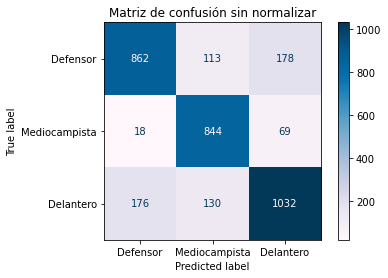

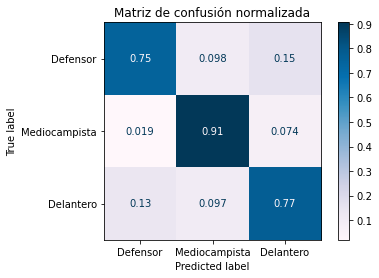

In [46]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import plot_confusion_matrix

# Plot non-normalized confusion matrix
titles_options = [('Matriz de confusión sin normalizar', None),
                  ('Matriz de confusión normalizada', 'true')]

clases = ['Defensor', 'Mediocampista', 'Delantero']

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf.fit(X_train_sc, y_train),
                                X_test_sc,
                                y_test,
                                display_labels=clases,
                                cmap='PuBu',
                                normalize=normalize)
    disp.ax_.set_title(title)

En cuanto a las curvas ROC vamos a graficar una curva para cada clase y las curvas de micro y macro promedio.

La curva micro es la curva ROC de micro-promedios, calculada a partir de la suma de todos los positivos verdaderos y falsos positivos en todas las clases. La curva macro es la curva ROC de macro-promedios, que simplemente toma el promedio de las curvas en todas las clases.

Si el clasificador es bueno, se espera que la curva pase por la esquina superior izquierda, situación a la que correspondería un área bajo la curva = 1.

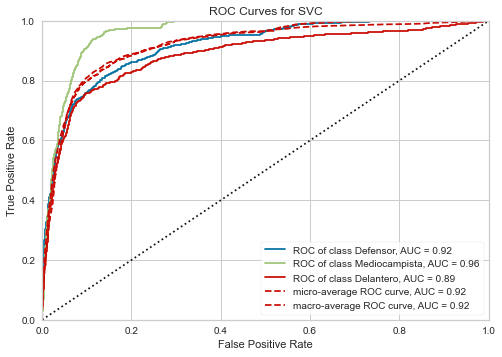

In [47]:
from yellowbrick.classifier import ROCAUC

clases = ['Defensor', 'Mediocampista', 'Delantero']

visualizer = ROCAUC(clf, classes=clases)

visualizer.fit(X_train_sc, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_sc, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

Como podemos ver, a partir del 0.3 las ROC se van despegando del eje aunque siguen manteniendose bastante cercanas a la esquina superior izquierda. También puede observarse que _SVC_ clasifica mejor a la clase Mediocampista, seguido por Defensor y por último Delantero.

Dado que se consideran buenos clasificadores aquellos que presentan un AUC > 0.90 de la macro-average curva, podemos decir que nuestro clasificador (con AUC macro-average = 0.92) es un buen clasificador (recordar que la precisión de _SVC_ es 80%, no es la panacea pero tampoco está tan mal).

Otro aspecto a analizar es que, al ser altos los valores de AUC ($\leq$ 0.90 salvo para Delantero), las clases se pueden separar bastante bien. Sin embargo Delantero y Defensor tienen AUCs similares mientras que el de Mediocampista es más alto. Por otro lado, si tenemos en cuenta la matriz de confusión podemos notar que Defensor y Delantero tienen similitudes pero Mediocampista está más separado de estas. Esto nos indica que el algoritmo clasifica mejor a ésta última clase y "se le mezclan" más las dos restantes.

### 3 e) Grafique los datos de prueba sobre las dos primeras componentes principales. Realice dos gráficos, uno coloreando los puntos según la etiqueta real y otro según la clasificacion obtenida por el modelo optimizado en c). Comente acerca de lo observado.

In [51]:
import seaborn as sns
from sklearn import decomposition
from matplotlib import colors

No entendí bien qué es lo que se pide en este apartado pero yo hice lo siguiente: 

En primer lugar consideré que los datos de prueba a los que se refiere el enunciado son solo los de testeo. Además, como el modelo que venimos usando tiene los datos estandarizados, son los que también usaremos acá.
De esta forma, y como se pide los datos reales y los obtenidos por medio del clasificador óptimo (el _SVC_), me quedaron dos conjuntos de datos distintos:

* Conjunto 1: {X_test_sc, y_test_sc}
* Conjunto 2: {X_test_sc, y_pred}

donde el primero viene de aplicar SC a los datos de testeo reales y el segundo son los X de testeo reales pero con la predicción que dio el _SVC_.

Aclarado esto vamos a mostrar cómo quedó PCA para las primeras 2 componentes en ambos conjuntos 1 y 2.


#### PCA para el conjunto 1:

37.2521254698941 %
21.578041076110825 %


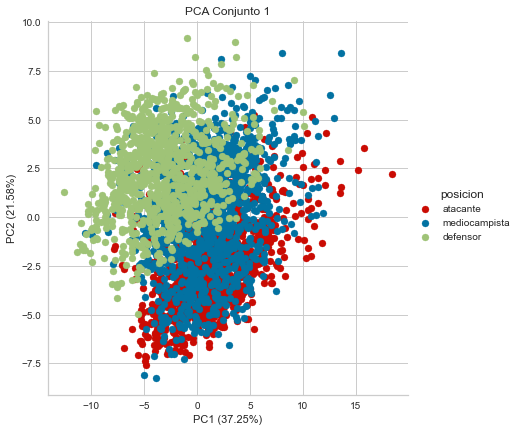

In [96]:
df_X_test_sc = pd.DataFrame(X_test_sc)
df_y_test = pd.DataFrame(y_test)
df_y_test2 = df_y_test.reset_index(drop=True)
df_y_test2
df_test_sc = pd.concat([df_X_test_sc, df_y_test2], axis=1, join='inner')
df_test_sc

pca_test_sc = decomposition.PCA(n_components=2)
X_data_test_sc = df_test_sc.iloc[:, :43].values
pca_test_sc.fit(X_data_test_sc)
data_test_sc = pca_test_sc.transform(X_data_test_sc1)

vr_test_sc = pca_test_sc.explained_variance_ratio_
print(100*pca_test_sc.explained_variance_ratio_[0], '%')
print(100*pca_test_sc.explained_variance_ratio_[1], '%')

df_pca_test_sc = pd.DataFrame(data_test_sc, columns=["PC1", "PC2"])
df_pca_test_sc['posicion'] = df_test_sc.iloc[:, 43]
y_labels_test_sc = df_test_sc.iloc[:, 43].replace({'defensor':0, 'mediocampista':1, 'atacante':2}).copy()

g_test_sc = sns.FacetGrid(df_pca_test_sc, hue='posicion', hue_kws={'color': ['r', 'b', 'g']}, size=6) .map(plt.scatter,'PC1', 'PC2', ).add_legend()
plt.title('PCA Conjunto 1')
g_test_sc.ax.set_xlabel('PC1 (37.25%)')
g_test_sc.ax.set_ylabel('PC2 (21.58%)')

plt.show()

#### PCA para el conjunto 2:

37.25212546989399 %
21.57804107611076 %


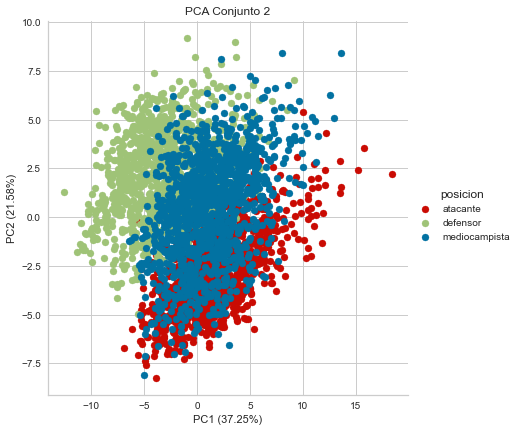

In [97]:
df_X_test_sc = pd.DataFrame(X_test_sc)
df_y_pred = pd.DataFrame(y_pred)

df_test_sc = pd.concat([df_X_test_sc, df_y_pred], axis=1, join='inner')
df_test_sc.head()

pca_test_sc = decomposition.PCA(n_components=2)
X_data_test_sc = df_test_sc.iloc[:, :43].values
pca_test_sc.fit(X_data_test_sc)
data_test_sc = pca_test_sc.transform(X_data_test_sc)

vr_test_sc = pca_test_sc.explained_variance_ratio_
print(100*pca_test_sc.explained_variance_ratio_[0], '%')
print(100*pca_test_sc.explained_variance_ratio_[1], '%')

df_pca_test_sc = pd.DataFrame(data_test_sc, columns=['PC1', 'PC2'])
df_pca_test_sc['posicion'] = df_test_sc.iloc[:, 43]
y_labels_test_sc = df_test_sc.iloc[:, 43].replace({'defensor':0, 'mediocampista':1, 'atacante':2}).copy()

g_test_sc = sns.FacetGrid(df_pca_test_sc, hue='posicion', hue_kws={'color': ['r', 'g', 'b']}, size=6) .map(plt.scatter,'PC1', 'PC2', ).add_legend()
plt.title('PCA Conjunto 2')
g_test_sc.ax.set_xlabel('PC1 (37.25%)')
g_test_sc.ax.set_ylabel('PC2 (21.58%)')

plt.show()

Podemos ver que en el conjunto original de datos las diferentes clases están mucho más mezcladas entre sí que para el conjunto de las predicciones, donde están un poco más separadas, logrando distinguir la clase `defensor` y `atacante` en los extremos y divididos por la clase `mediocampista`, situada en el centro. En esta segunda figura es interesante notar también que hay muchos mediocampistas encimando a delanteros o defensores, lo que podemos atribuir a varios factores: uno de ellos es que hay jugadores definidos en una posición incorrecta debido a que éste juega en muchas posiciones; otro es que, por la misma razón que antes, al clasificador le cuesta diferenciar entre cada una de las posiciones y por último, que estas 2 componentes principales representan menos del 60% de los datos totales.

##### Bibliografía:

* Boxplots en matplotlib
    * https://towardsdatascience.com/creating-boxplots-of-well-log-data-using-matplotlib-in-python-34c3816e73f4
* Diagramas de torta (pie charts) 
    * https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
    * https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/
* Eliminar una de las clases de un DataFrame
    * https://stackoverflow.com/questions/41170971/how-to-delete-fraction-of-rows-that-has-specific-attribute-value-from-pandas-dat
* Aplicar StandardScale
    * https://stackoverflow.com/questions/14688391/how-to-apply-standardization-to-svms-in-scikit-learn
* Clases de Sebastian Raschka sobre k-fold cross validation
    * https://www.youtube.com/watch?v=0fueKIB76Rk
    * https://www.youtube.com/watch?v=EqQ-Sb15CT8
    * https://github.com/rasbt/stat451-machine-learning-fs20/blob/master/L10/code/10_06_kfold-sele.ipynb
* Raschka y PCA
    * https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html
* Más PCA
    * https://towardsdatascience.com/how-do-you-apply-pca-to-logistic-regression-to-remove-multicollinearity-10b7f8e89f9b
* Matriz de confusión
    * https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_estimator
* PUSIOL